In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header=None, names=['parents','has_nurs','form','children','housing','finance','social','health','output'])
df = df.replace(' ?', np.nan)
df.dropna(inplace=True)
df.head()


,parents,has_nurs,form,children,housing,finance,social,health,output
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [4]:
df.shape

(12960, 9)

In [5]:
ohe = OneHotEncoder()
le = LabelEncoder()
df.output = le.fit_transform(df.output)
df = pd.get_dummies(df, columns = ['parents', 'children','has_nurs', 'form', 'housing', 'finance', 'social', 'health'])
df.head()

,output,parents_great_pret,parents_pretentious,parents_usual,children_1,children_2,children_3,children_more,has_nurs_critical,has_nurs_improper,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,2,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,1,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,2,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [6]:
class_2 = df[df['output'] == 2]
class_2_over = class_2.sample(75,replace=True)
test_under = pd.concat([df, class_2_over], axis=0)


In [7]:
test_under.output.value_counts()

0    4320
1    4266
3    4044
4     328
2      77
Name: output, dtype: int64

In [8]:
max_acc = 0
acc_list = []
param_list = []
for i in range(10):
    sample_df = test_under.sample(frac=0.20, replace=False)
    x_train, x_test, y_train, y_test = train_test_split(sample_df.drop('output', axis=1), sample_df.output, train_size=0.7,test_size=0.3, random_state=7, stratify=sample_df.output)
    # x_train = StandardScaler().fit_transform(x_train)
    param_grid = { 
                 'C':[0.1, 0.5, 1, 2, 3],
                'kernel':['rbf', 'poly', 'sigmoid', 'linear'],
                'degree':[1, 2, 3, 4],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
                }
    
    grid = GridSearchCV(SVC(max_iter=100), param_grid)
    grid.fit(x_train, y_train)  
    y_pred = grid.predict(x_test)
    print(grid.best_params_)
    print('Sample {}'.format(i+1))
    print('Accuracy: {}\n'.format(accuracy_score(y_test, y_pred))) 
    
    acc_list.append(accuracy_score(y_test, y_pred))
    param_list.append(grid.best_params_)
    
    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc = accuracy_score(y_test, y_pred)
        best_params = grid.best_params_
        best_model = grid.best_estimator_
        best_sample_df = sample_df

{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 1
Accuracy: 0.9706257982120051

{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 2
Accuracy: 0.9821200510855683

{'C': 0.5, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 3
Accuracy: 0.9872286079182631

{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Sample 4
Accuracy: 0.979565772669221

{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 5
Accuracy: 0.9872286079182631

{'C': 3, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Sample 6
Accuracy: 0.9719029374201787

{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Sample 7
Accuracy: 0.9910600255427842

{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Sample 8
Accuracy: 0.9757343550446999

{'C': 0.5, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 9
Accuracy: 0.979565772669221

{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 10
Accuracy: 0.979565772669221



In [9]:
sample_df['output'].value_counts()

1    877
0    852
3    790
4     71
2     17
Name: output, dtype: int64

In [11]:
print(acc_list)
print(param_list)

[0.9706257982120051, 0.9821200510855683, 0.9872286079182631, 0.979565772669221, 0.9872286079182631, 0.9719029374201787, 0.9910600255427842, 0.9757343550446999, 0.979565772669221, 0.979565772669221]
[{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.5, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}, {'C': 3, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.5, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}]


In [10]:
final_df = pd.DataFrame(data=[acc_list, param_list], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.970626,"{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': ..."
1,0.98212,"{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': ..."
2,0.987229,"{'C': 0.5, 'degree': 2, 'gamma': 1, 'kernel': ..."
3,0.979566,"{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': ..."
4,0.987229,"{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': ..."
5,0.971903,"{'C': 3, 'degree': 3, 'gamma': 0.1, 'kernel': ..."
6,0.99106,"{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': ..."
7,0.975734,"{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': ..."
8,0.979566,"{'C': 0.5, 'degree': 2, 'gamma': 1, 'kernel': ..."
9,0.979566,"{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': ..."


In [12]:
print(max_acc)
print(best_params)
print(best_model)
best_sample_df.head()

0.9910600255427842
{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
SVC(C=0.1, gamma=1, kernel='poly', max_iter=100)


,output,parents_great_pret,parents_pretentious,parents_usual,children_1,children_2,children_3,children_more,has_nurs_critical,has_nurs_improper,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
3252,1,0,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
9096,1,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
2995,3,0,0,1,0,0,0,1,1,0,...,0,1,1,0,0,1,0,0,1,0
7297,3,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
10618,3,1,0,0,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0


In [16]:
iterations = list()
acc_list = list()
x_train, x_test, y_train, y_test = train_test_split(best_sample_df.drop('output', axis=1), best_sample_df.output, test_size=0.3, random_state=42, stratify=best_sample_df.output)
x_train = StandardScaler().fit_transform(x_train)

for i in range(100):
    x = i+1
    svm = SVC(C=2, degree=1, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

iterations = np.array(iterations)
acc_list = np.array(acc_list)


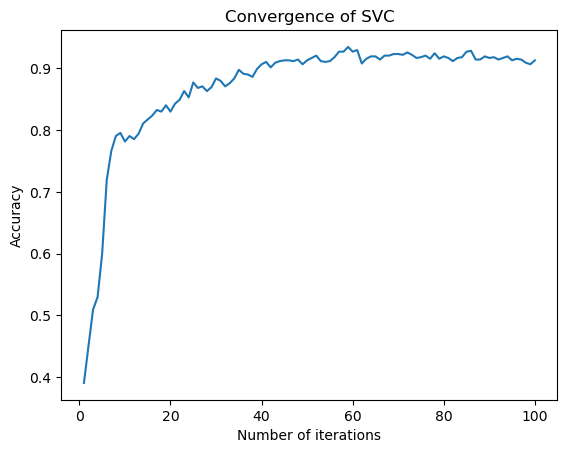

In [17]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()

In [15]:
import dataframe_image as dfi
dfi.export(final_df, 'dataframe.png')

/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
